Mobile lat-long activity over 3 months 

In [1]:
data_url = 'https://developer.here.com/documentation/geovisualization/topics/sample-datasets.html'

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
morig = pd.read_csv('Mobile_activity_3months_scrambled.csv')

morig.head(5)

,lat,lon,timestep,count
0,25.696395,-80.297496,1,1
1,25.699544,-80.297055,1,1
2,25.698612,-80.292015,1,1
3,25.939942,-80.341607,1,1
4,25.939221,-80.349899,1,1


In [5]:
morig.shape

(512326, 4)

In [6]:
morig.describe()

# Here we see vital min-max info for lat / long / count

,lat,lon,timestep,count
count,512326.000000,512326.000000,512326.000000,512326.000000
mean,37.812142,-95.652574,2.651530,1.354696
std,5.501209,17.954173,0.480565,6.622608
min,24.546459,-124.496979,1.000000,1.000000
25%,33.714352,-117.182923,2.000000,1.000000
50%,38.665160,-90.676204,3.000000,1.000000
75%,41.732180,-80.300187,3.000000,1.000000
max,49.052787,-68.204062,3.000000,2314.000000


In [7]:
morig['timestep'].value_counts()

3    334796
2    176530
1      1000
Name: timestep, dtype: int64

In [8]:
# preliminary idea out lat-long boundaries

print(morig[morig['lat'] == morig['lat'].min()])
print(morig[morig['lat'] == morig['lat'].max()])
print(morig[morig['lon'] == morig['lon'].min()])
print(morig[morig['lon'] == morig['lon'].max()])

print('\nLooks like USA is the lat-long boundaries')

              lat        lon  timestep  count
177538  24.546459 -81.794456         3      1
              lat         lon  timestep  count
177522  49.052787 -122.787965         2      1
              lat         lon  timestep  count
152015  42.747985 -124.496979         2      3
              lat        lon  timestep  count
155502  44.383529 -68.204062         2      2

Looks like USA is the lat-long boundaries


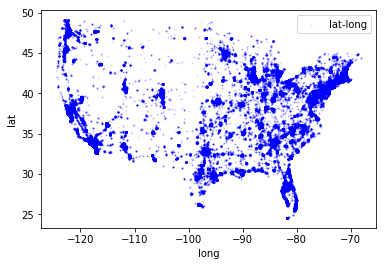


Visualizing mobile activity


In [9]:
plt.scatter(morig['lon'].values[:],
            morig['lat'].values[:],
            color='blue', s=1, label='lat-long', alpha=0.1
           )

plt.legend(loc=0)
plt.ylabel('lat')
plt.xlabel('long')

plt.show()

print('\nVisualizing mobile activity')

In [10]:
for x in range(1,4):
    mtime = morig[morig['timestep'] == x]
    print(mtime.head(3))
    print('\n')
    
print('Testing For Loop for individual timestep dataframes')

         lat        lon  timestep  count
0  25.696395 -80.297496         1      1
1  25.699544 -80.297055         1      1
2  25.698612 -80.292015         1      1


            lat        lon  timestep  count
1000  24.549857 -81.803967         2      2
1001  24.548606 -81.800284         2      2
1002  24.550939 -81.803121         2      1


              lat        lon  timestep  count
177530  24.546641 -81.795802         3      1
177531  24.552507 -81.793803         3      1
177532  24.547979 -81.797485         3      1


Testing For Loop for individual timestep dataframes


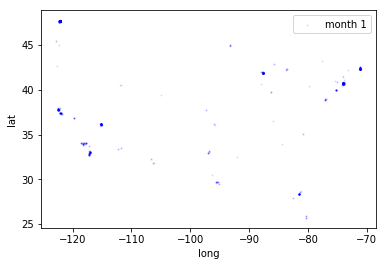

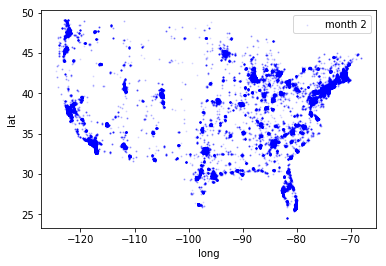

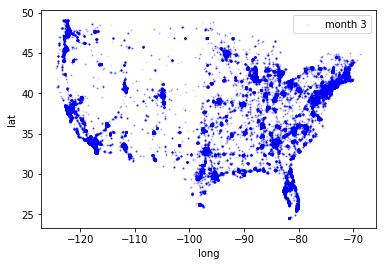

Visualizing each timestamp:
We see that geo distribution is constistent,
however data points increase for each month


In [11]:
for x in range(1,4):
    mtime = morig[morig['timestep'] == x]
    
    plt.scatter(mtime['lon'].values[:],
            mtime['lat'].values[:],
            color='blue', s=1, label='month ' + str(x), alpha=0.1
           )
    
    plt.legend(loc=0)
    plt.ylabel('lat')
    plt.xlabel('long')

    plt.show()
    
print('Visualizing each timestamp:')
print('We see that geo distribution is constistent,')
print('however data points increase for each month')

In [12]:
# will attempt heatmap with scatter plot via column 'count'

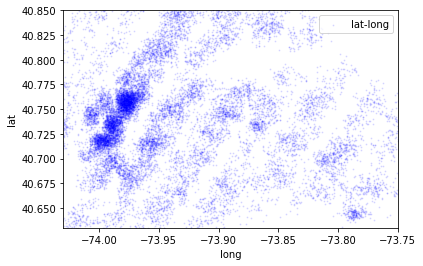


Visualizing mobile activity in NYC


In [13]:
nyc_long_border = (-74.03, -73.75)
nyc_lat_border = (40.63, 40.85)

plt.scatter(morig['lon'].values[:],
            morig['lat'].values[:],
            color='blue', s=1, label='lat-long', alpha=0.1
           )

plt.legend(loc=0)
plt.ylim(nyc_lat_border)
plt.xlim(nyc_long_border)
plt.ylabel('lat')
plt.xlabel('long')

plt.show()

print('\nVisualizing mobile activity in NYC')

In [14]:
# building dataframe for NYC data points only

mnyc = morig[(morig['lat'] >= 40.65) & (morig['lat'] <= 40.85) &
             (morig['lon'] >= -74.03) & (morig['lon'] <= -73.93)
            ]
mnyc.shape

(9366, 4)

In [15]:
mnyc.describe()

,lat,lon,timestep,count
count,9366.000000,9366.000000,9366.000000,9366.000000
mean,40.742727,-73.977243,2.505232,1.600470
std,0.040369,0.021335,0.519892,0.805544
min,40.650103,-74.029955,1.000000,1.000000
25%,40.716694,-73.992354,2.000000,1.000000
50%,40.743746,-73.979304,3.000000,2.000000
75%,40.762539,-73.963670,3.000000,2.000000
max,40.849975,-73.930003,3.000000,34.000000


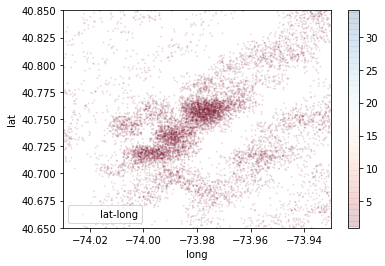


Attempting to visualize NYC activity as heatmap by count,
however map is overwhelmingly red (low activity)


In [16]:
nyc_long_border = (-74.03, -73.93)
nyc_lat_border = (40.65, 40.85)

plt.scatter(mnyc['lon'].values[:],
            mnyc['lat'].values[:],
            c=mnyc['count'].values[:], cmap='RdBu',
            s=1, label='lat-long', alpha=0.1
           )

plt.legend(loc=0)
plt.ylim(nyc_lat_border)
plt.xlim(nyc_long_border)
plt.ylabel('lat')
plt.xlabel('long')

plt.colorbar() # show color scale

plt.show()

print('\nAttempting to visualize NYC activity as heatmap by count,')
print('however map is overwhelmingly red (low activity)')

In [17]:
mnyc['count'].value_counts().sort_index()

# below shows that activity higher than 2 is much too rare to visualize

1     4488
2     4524
3      108
4      200
5       13
6       22
7        2
8        2
10       3
12       2
15       1
34       1
Name: count, dtype: int64

In [47]:
mnycbig = mnyc[(mnyc['count'] > 2) & (mnyc['count'] < 30)]

mnycbig.shape

(353, 4)

In [48]:
mnyclil = mnyc[mnyc['count'] <= 2]

mnyclil.shape

(9012, 4)

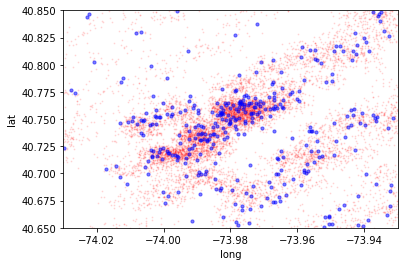


Separate data points greater than 2 to visualize high activity areas


In [51]:
nyc_long_border = (-74.03, -73.93)
nyc_lat_border = (40.65, 40.85)

plt.scatter(mnyclil['lon'].values[:],
            mnyclil['lat'].values[:],
            color='Red',
            s=1, alpha=0.1
           )

plt.scatter(mnycbig['lon'].values[:],
            mnycbig['lat'].values[:],
            marker='o', 
            color='Blue',
            s=10, alpha=0.5
           )

plt.ylim(nyc_lat_border)
plt.xlim(nyc_long_border)
plt.ylabel('lat')
plt.xlabel('long')

plt.show()

print('\nSeparate data points greater than 2 to visualize high activity areas')

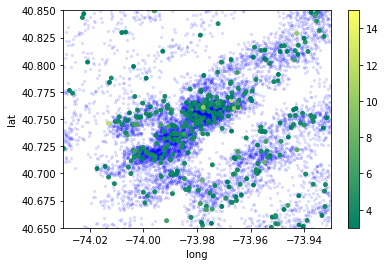


Further separate high activity data points


In [52]:
nyc_long_border = (-74.03, -73.93)
nyc_lat_border = (40.65, 40.85)

plt.scatter(mnyclil['lon'].values[:],
            mnyclil['lat'].values[:],
            color='Blue',
            s=5, alpha=0.1
           )

plt.scatter(mnycbig['lon'].values[:],
            mnycbig['lat'].values[:],
            marker='o',
            c=mnycbig['count'].values[:], cmap='summer',
            s=15, alpha=1
           )

plt.ylim(nyc_lat_border)
plt.xlim(nyc_long_border)
plt.ylabel('lat')
plt.xlabel('long')

plt.colorbar()

plt.show()

print('\nFurther separate high activity data points')

In [22]:
# will revisit with Folium